In [1]:
#Loading All Needed Libraries

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# #Number Manupulation & Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# #Model Selection Libraries
# from sklearn import model_selection
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import validation_curve

# #Preprocessing Libraries
# from sklearn.preprocessing import scale
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import PolynomialFeatures

# #Liner Model Libraries
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet

# #pipeline libraries
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline

# #Metrics
from sklearn import metrics
# from sklearn.metrics import confusion_matrix

# import sklearn
# import sklearn.decomposition

# from sklearn.svm import SVC
# from sklearn.feature_selection import RFE

# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

<font color=red size=6> Define Objective </font>

Predict the price of house
1. It is a regression problem
- Make a model which has highest R-square score on test dataset. 
- At the same time R-Score score on Train dataset should be such that it can be confidently accepted by the customer

<font color=red size=6> Understanding Dataset</font>

In [3]:
df = pd.read_csv("House_train.csv")

In [4]:
df.shape

(1460, 81)

In [5]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
print('df uses {0} MB'.format(df.memory_usage().sum()/1024**2))
#print(df.memory_usage())
df.info()

df uses 0.9023284912109375 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null obje

In [7]:
df.select_dtypes("int64").max().sort_values()[::-1]
tmp_cols =dict(df.select_dtypes("int64").max().sort_values()[::-1])

for k,v in tmp_cols.items():
    if v>32000:
        df[k] = df[k].astype("uint32")
    else:
        df[k] = df[k].astype("uint16")

#df.select_dtypes("float64").max().sort_values()[::-1]
tmp_cols = df.select_dtypes("float64").columns

df[tmp_cols] = df[tmp_cols].astype("float32")

#df.select_dtypes("object").max().sort_values()[::-1]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null uint16
MSSubClass       1460 non-null uint16
MSZoning         1460 non-null object
LotFrontage      1201 non-null float32
LotArea          1460 non-null uint32
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null uint16
OverallCond      1460 non-null uint16
YearBuilt        1460 non-null uint16
YearRemodAdd     1460 non-null uint16
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      146

In [8]:
#Check Null Value Columns
(df.isnull().sum()/len(df)*100).sort_values()[::-1].head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
dtype: float64

In [9]:
#Identify Fields which has more than 45% null values
f= list((df.isnull().sum() /len(df)*100) >45)
cols_45perNullVal = df.iloc[:,f].columns

print ("Dropping {} fields: {}".format( len(cols_45perNullVal), cols_45perNullVal))
df.drop(columns=cols_45perNullVal, inplace=True)

Dropping 5 fields: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [10]:
#Create a list of Categorical Variables. This step is useful when there are many fields in dataset
#If they are numeric in nature, convert into Object
#In final dataset all categorical variable (ordinal, nominal) will be object type
categories = min(30, int(len(df)*.5))
cat_flds = []
for col in df.columns:
    if len(df[col].unique())<categories:
        cat_flds.append(col)
        print (col, df[col].unique())


MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'She

In [11]:
#df.info()

In [12]:
df[cat_flds].head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,0,0,0,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,0,0,0,5,2007,WD,Normal


In [13]:
#None of these categorical field are ordinal field. 
#If there is any then we need to list them separately in the below column identification step
print ("There are %d categorical fields in dataset"%(len(cat_flds)) )

There are 56 categorical fields in dataset


<font color=red size=3>__Preparing List of Different Types of Columns__</font>

- Scaling is done only for cols_all_num
- Dummy field creation only for cols_all_nom
- Null Value Imputation of cols_all_num using iterative imputer
- Null Value Imputation of cols_all_cat using K Neighbour Mean
- Columns used for null value imputation in KNM all cols_all_num + cols_with_NonNullVal_cat
- Ordinal fields are part of cols_all_cat list

In [14]:
target="SalePrice"

In [15]:
############################All Columns of Different Types
##All Numerial Fields in Dataset
cols_all_num = list(set(list(df.columns)).difference(set(cat_flds)))

##All Categorical Fields in Dataset
cols_all_cat = cat_flds

#if target variable is categorical then remove from cols_all_cat list and else remove from cols_all_num
try:
    cols_all_num.remove(target)
except: pass

try:
    cols_all_cat.remove(target)
except: pass
    
##All Numerial Fields in Dataset which has Ordinal Variable
#cols_all_ord  = []
cols_all_ord  = ['OverallQual','OverallCond','HalfBath','FullBath','BsmtFullBath','BsmtHalfBath',
                 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold',
                 'YrSold','MSSubClass']

##All Numerial Fields in Dataset which has Ordinal Variable
cols_all_nom = list(set(cols_all_cat).difference(set(cols_all_ord)))


############################All Null Value Columns
#All Fields which has any Null values
fld_TF = list((df.isnull().sum() /len(df)*100) >0)
cols_with_NullVal_all = df.iloc[:,fld_TF].columns
#Numeric Fields which has any Null values
cols_with_NullVal_num= list(  df[cols_all_num].iloc[ :,list(df[cols_all_num].isna().sum()>0) ].columns )
#Categorical Fields which has any Null values
cols_with_NullVal_cat= list(  df[cols_all_cat].iloc[ :,list(df[cols_all_cat].isna().sum()>0) ].columns )
#Ordinal Fields which has Null Values
fld_TF = list((df[cols_all_ord].isnull().sum() /len(df)*100) >0)
cols_with_NullVal_ord = df.iloc[:,fld_TF].columns


###########################All Non-Null Value Columns
#All Fields which has any Null values
fld_TF = list((df.isnull().sum() /len(df)*100) ==0)
cols_with_NonNullVal_all =df.iloc[:,fld_TF].columns
#Numeric Fields which has any Null values
cols_with_NonNullVal_num= list(  df[cols_all_num].iloc[ :,list(df[cols_all_num].isna().sum()==0) ].columns )
#Categorical Fields which has any Null values
cols_with_NonNullVal_cat= list(  df[cols_all_cat].iloc[ :,list(df[cols_all_cat].isna().sum()==0) ].columns )
#Ordinal Fields which has Null Values
fld_TF = list((df[cols_all_ord].isnull().sum() /len(df)*100) ==0)
cols_with_NonNullVal_ord =df.iloc[:,fld_TF].columns

In [16]:
print (len(cols_all_nom))
print ("All", "Number", "Oridinal","Categorical")
print ( len(df.columns),              len(cols_all_num),             len(cols_all_ord),            len(cols_all_cat) )
print ( len(cols_with_NullVal_all)   ,len(cols_with_NullVal_num)   , len(cols_with_NullVal_ord)   , len(cols_with_NullVal_cat))
print ( len(cols_with_NonNullVal_all),len(cols_with_NonNullVal_num), len(cols_with_NonNullVal_ord), len(cols_with_NonNullVal_cat))

42
All Number Oridinal Categorical
76 19 14 56
14 3 0 11
62 16 14 45


<font color=red size=6>Check Null Values</fond>

In [17]:
#% of null values in all types of Fields
temp=(df.isnull().sum()/len(df)*100).sort_values()[::-1]
temp[temp>0]

LotFrontage     17.739726
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [18]:
##% of Null value in Categorical Fields
temp=(df[cols_all_cat].isnull().sum() /len(df)*100).sort_values()[::-1]
temp[temp>0]

GarageCond      5.547945
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtQual        2.534247
BsmtCond        2.534247
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

In [19]:
##Null Value percentage for numeric fields
temp= (df[cols_all_num].isnull().sum() /len(df)*100).sort_values()[::-1]
df_num =temp[temp>0]
df_num

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [20]:
#Stats of Null Value Numeric Columns
df[cols_with_NullVal_num].describe()

,MasVnrArea,GarageYrBlt,LotFrontage
count,1452.000000,1379.000000,1201.000000
mean,103.685265,1978.506104,70.049957
std,181.066681,24.689711,24.284721
min,0.000000,1900.000000,21.000000
25%,0.000000,1961.000000,59.000000
50%,0.000000,1980.000000,69.000000
75%,166.000000,2002.000000,80.000000
max,1600.000000,2010.000000,313.000000


In [21]:
#Stats of all cat Columns
df[cols_all_cat].describe()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,5.844521,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,3.409589,2.758904,43.489041,6.321918,2007.815753
std,42.300571,1.382997,1.112799,48.623081,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,29.317331,40.177307,496.123024,2.703626,1.328095
min,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,6.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,7.000000,6.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,10.000000,9.000000,572.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,508.000000,738.000000,15500.000000,12.000000,2010.000000


In [22]:
#Stats of all cat Columns
#df[cols_all_ord].describe()

In [23]:
##check what kind of values are stored in catorical fields
cats = ((df[cols_all_cat].isnull().sum() /len(df)*100).sort_values()[::-1]>0).index

for i in cats:
    print ( df[i].astype("object").value_counts() , "\n=====================================")

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 
Inside     1052
Cor

<font color=red size=6>Check Data Imbalance</font>

<font color=red size=5> Target Variable Data Imbalance</font>

<font color=red size=5>__For Categorical Target Variable__</font>

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df[target])
plt.show()

<font color=red size=5>__For Numerical Target Variable__</font>

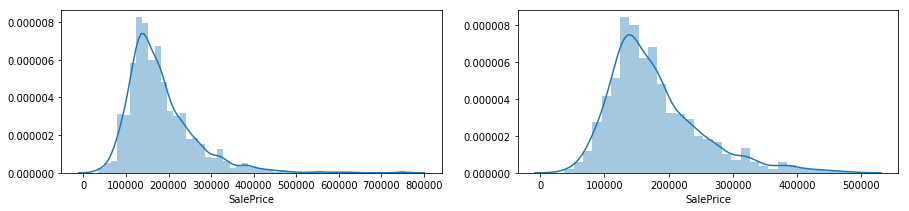

In [24]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df[target])
plt.subplot(1,2,2)
sns.distplot( df[ (df[target]<=500000) & (df[target]>36000) ][target] )
plt.show()

# of outlier Records 20


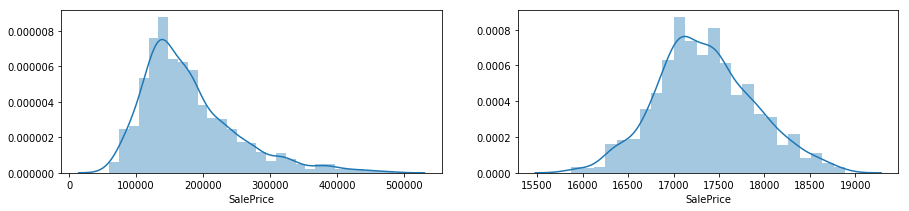

In [25]:
print ("# of outlier Records",len(df[  ~ ((df[target]<=500000) & (df[target]>=60000)) ]) )
#Removing Outliers
df = df[   ((df[target]<=500000) & (df[target]>=60000)) ]
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df[target])
plt.subplot(1,2,2)
sns.distplot(np.log2(df[target])*1000)
plt.show()

<font color=red size=3>__Feature Engineering on Numerical Target Variable__</fond>

In [26]:
#Scale Target Variable
df[target] = np.log2(df[target])*1000

<font color=red size=5> Categorical Variable Data Imbalance</fond>

In [27]:
df[cols_all_cat].head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,0,0,0,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,0,0,0,5,2007,WD,Normal


<font color=red size=5> Oridinal Variable Data Imbalance</font>

<font color=red size=5> Numerical Variable Data Distribution</font>

<font color=red size=3> Feature Engigneering</font>

<font color=red size=3> Check Distribution Now</font>

<font color=red size=6>Imputing Null Values</font>

<font color=red size=3>__Convert categorical variables into number__</font>

We need to convert values in categorical variables in number for following reasons.
1. So that we can check relation between categorical variable and sales price. 
- So that we can do Categorical Field's null value imputation using K Neighbour Mean. 
- So that we can do the modeling 

In [28]:
#df1= df.copy()

In [29]:
global all_fldmap
all_fldmap = pd.DataFrame()
isNanFld=False

for fld in cols_all_cat:

    lst = list(df[fld].unique())
    try:
        if lst.index(np.nan):
            isNanFld=True
            lst.remove(np.nan)
            lst.insert(0,np.nan)
    except:
        continue
    finally:
        print ("Field Name:" , fld)
        print ("Original=>",lst)
        print ("Numeric=>",np.array(range(len(lst))), "\n")

        fmap = pd.DataFrame( list( zip([fld]*len(lst),lst, np.array(range(len(lst))) ) ) )
        fmap.columns = ['Fname','Original','Numeric']
        df[fld] = df[fld].apply(lambda x: lst.index(x))
        df[fld] = df[fld].astype(object)
        if isNanFld:
            df.loc[ df[fld]==0, fld] = np.nan
            isNanFld=False

        all_fldmap = pd.concat([all_fldmap,fmap])

Field Name: MSSubClass
Original=> [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]
Numeric=> [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

Field Name: MSZoning
Original=> ['RL', 'RM', 'FV', 'C (all)', 'RH']
Numeric=> [0 1 2 3 4] 

Field Name: Street
Original=> ['Pave', 'Grvl']
Numeric=> [0 1] 

Field Name: LotShape
Original=> ['Reg', 'IR1', 'IR2', 'IR3']
Numeric=> [0 1 2 3] 

Field Name: LandContour
Original=> ['Lvl', 'Bnk', 'Low', 'HLS']
Numeric=> [0 1 2 3] 

Field Name: Utilities
Original=> ['AllPub', 'NoSeWa']
Numeric=> [0 1] 

Field Name: LotConfig
Original=> ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Numeric=> [0 1 2 3 4] 

Field Name: LandSlope
Original=> ['Gtl', 'Mod', 'Sev']
Numeric=> [0 1 2] 

Field Name: Neighborhood
Original=> ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blm

<font color=red size=3>__Impute Numeric Value Fields__</font>

In [30]:
#Impute Numeric Null Values Columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
my_imputer = IterativeImputer()
df_filled = my_imputer.fit_transform( df )
df_filled = pd.DataFrame(df_filled, columns=df.columns, index= df.index)

#in above steps categorical fields also got imputed. Because Iterative Imputer uses Linear Regression for imputation
#I don't want decimal number in imputed filed so reverting back those imputation.
df[cols_with_NullVal_num] = df_filled[cols_with_NullVal_num]

<font color=red size=3>__Impute Categorical Value Fields__</font>

In [31]:
#Impute Null Categorical Values
#Imputation will be done using non_null cols
def imputeNull_CatValues(df,fld):
 
    X_test = df[NonNullVal_cols]

    cols=NonNullVal_cols.copy()
    if fld not in cols:
        cols.append(fld)


    #training using none-null columns
    df_train = df [cols] [ df[fld].notna()] 

    #supplied fld in dataframe need to be classified. So we need to train using this field
    y_train= df_train[fld]
    X_train = df_train.drop(columns=fld)
    clusters = len(y_train.unique() )

    #KNeighborsClassifier is working better than above LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    km = KNeighborsClassifier(n_neighbors=clusters)

    #t= X_train.isna().sum(axis=0)>=0
    #print ( X_train.loc[ ::,t ])
    #print (y_train.isna().sum())

    km.fit(X_train,y_train.astype(int))
    pred_train_clusterid = km.predict(X_train)
    pred_test_clusterid = km.predict(X_test)

    print (fld,"Accuracy on Train Dataset :",
    round(metrics.accuracy_score(y_train.astype(int), pred_train_clusterid),2))
    print ("==========================================")

    df1 = pd.DataFrame( {"prediction":pred_test_clusterid, "actual":df[fld]})

    #create a need field in temp dataframe df1, 
    #for a given field if actual==0 (it has null value) then use prediction to replace
    df1.loc[ df1["actual"].isna(),fld] = df1["prediction"]

    #If actual is not null then we should not use predicted cluster value, so use actual value
    df1.loc[ ~df1["actual"].isna(),fld] = df1["actual"]

    return (df1[fld])

In [35]:
## This steps impute null values only in Categorical Fields
temp =df.isna().sum()
NonNullVal_cols = list(temp[ temp==0].index)

for colname in cols_all_cat:
    if colname not in NonNullVal_cols:
        df[colname] = imputeNull_CatValues(df,colname)

MasVnrType Accuracy on Train Dataset : 0.78
BsmtQual Accuracy on Train Dataset : 0.79
BsmtCond Accuracy on Train Dataset : 0.92
BsmtExposure Accuracy on Train Dataset : 0.75
BsmtFinType1 Accuracy on Train Dataset : 0.68
BsmtFinType2 Accuracy on Train Dataset : 0.9
Electrical Accuracy on Train Dataset : 0.92
GarageType Accuracy on Train Dataset : 0.78
GarageFinish Accuracy on Train Dataset : 0.75
GarageQual Accuracy on Train Dataset : 0.95
GarageCond Accuracy on Train Dataset : 0.96


In [37]:
#Check Null Values
(df.isnull().sum()/len(df)*100).sort_values()[::-1]

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
                ... 
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageFinish     0.0
GarageType       0.0
HeatingQC        0.0
Fireplaces       0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF     

<font color=red size=4>For Regression Problem, Visualising Relationship between y & X</font>

<font color=red size=5>Check y & Cateorical Variable Relationship</font>

<font color=red size=5>Check y & Ordinal Variable Relationship</font>

<font color=red size=5> Check y & Numeric Variable Relationship</font>

<font color=red size=5> Check Degree of Correlation between y & Numeric Variable</font>

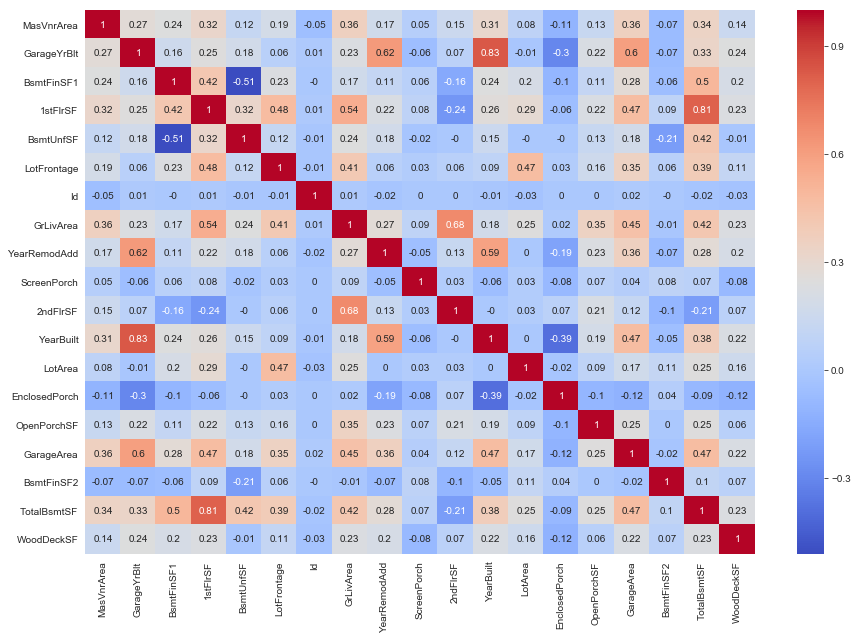

In [38]:
df_corr = np.round(df[cols_all_num].corr(),2)
sns.set_style("white")
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

<font color=red size=5> Create Dummy Fields</font>

In [39]:
df.shape

(1440, 76)

In [40]:
#Create dummy fields for all cateorical variables
dummies = pd.get_dummies( df[cols_all_cat] )
df.drop(columns=cols_all_cat, inplace=True)
df = pd.concat([df,dummies], axis=1)

print (dummies.shape, df.shape)

(1440, 401) (1440, 421)


<font color=red size=5> Find & Remove Outliers</font>

<font color=red size=3> Identify Outliers</font>

In [41]:
outlier_cols95 = df[cols_all_num].quantile(.95, axis = 0)
outlier_cols995 = df[cols_all_num].quantile(.995, axis = 0)

outlier_det = pd.DataFrame( {"Per95":outlier_cols95, "Per995": outlier_cols995})
outlier_det['Dif'] =100*(outlier_det.Per995-outlier_cols95)/outlier_cols995
outlier_det.sort_values("Dif", ascending=False)

,Per95,Per995,Dif
LotArea,17121.00,53203.600,67.819847
BsmtFinSF2,396.20,1051.930,62.335897
MasVnrArea,448.10,915.735,51.066630
ScreenPorch,156.20,307.905,49.270067
OpenPorchSF,175.05,312.000,43.894231
WoodDeckSF,328.25,575.610,42.973541
EnclosedPorch,183.05,290.025,36.884751
LotFrontage,105.05,164.880,36.286997
BsmtUnfSF,1459.45,1933.245,24.507758
GrLivArea,2448.10,3226.830,24.132973


In [42]:
#Only those columns which has more than 19% difference between 95 and 99.5 percentile has outlier values
outlier_cols = outlier_det.iloc[ list(outlier_det.Dif>19),: ].index
print (outlier_cols)

Index(['MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'BsmtUnfSF', 'LotFrontage',
       'GrLivArea', 'ScreenPorch', '2ndFlrSF', 'LotArea', 'EnclosedPorch',
       'OpenPorchSF', 'GarageArea', 'BsmtFinSF2', 'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')


<font color=red size=3> Visualize Outliers Distribution</font>

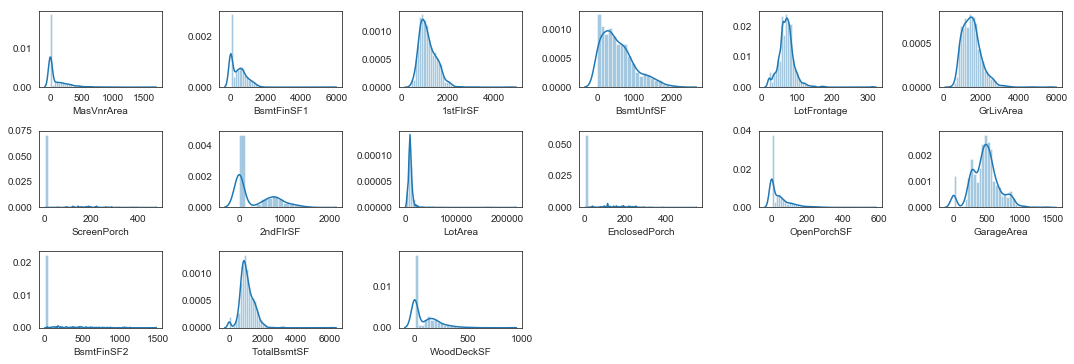

In [43]:
#Visualize the outlier fields
plt.figure(figsize=(15,100))
i=1
for col  in outlier_cols:
    plt.subplot(60, 6,i)
    sns.distplot(df[col])
    i+=1
    
plt.tight_layout()

<font color=red size=3> Remove Outliers</font>

In [44]:
#outlier_cols = ['BsmtFinSF1','GrLivArea','EnclosedPorch','MasVnrArea','LotFrontage','TotalBsmtSF']
outlier_cols_dict = dict( df[outlier_cols].quantile(.995, axis = 0))

for k,v in outlier_cols_dict.items():
    df =  df[ df[k]<=v]

<font color=red size=3> Visualize Again : Distribution of Old Outlier Fields</font>

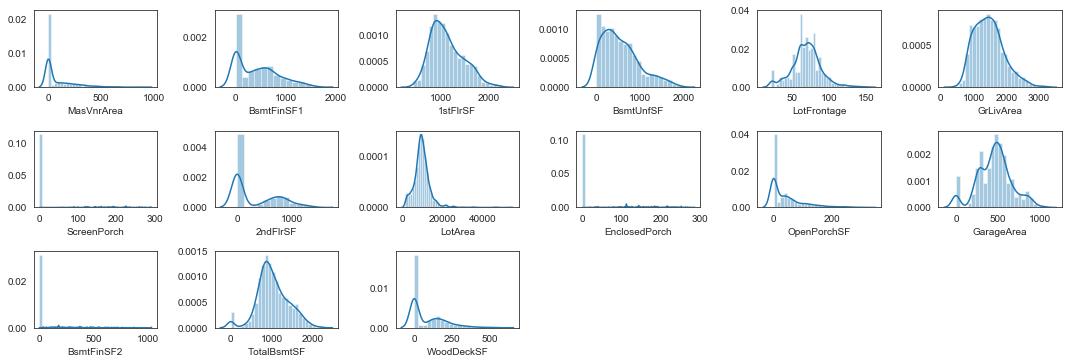

In [45]:
#Visualize the outlier fields
plt.figure(figsize=(15,100))
i=1
for col  in outlier_cols:
    plt.subplot(60, 6,i)
    sns.distplot(df[col])
    i+=1
    
plt.tight_layout()

<font color=blue size=4>__Store Cleaned Data and Dummy Parameter Mapped in separate File__</font>

In [46]:
df.to_csv("clean_train_data_surprisehouse.csv")
all_fldmap.to_csv("all_fldmap_surprisehouse.csv")

<font color=red size=5>__Split Dataset & Scale Numeric Fields__</font>

In [48]:
#Split Dataset in X & y
Xcols = list(df.columns)
Xcols.remove(target)

X = df[Xcols]
y = df[target]

In [49]:
# split X, y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
X_train_id = X_train.Id
X_test_id = X_test.Id

X_train = X_train.drop(columns="Id")
X_test = X_test.drop(columns="Id")

In [50]:
print(y_train.mean())
print(y_test.mean())

17325.051728827082
17284.70107475339


In [51]:
# scaling the numeric feature features in train and test
from sklearn.preprocessing import StandardScaler

cols_scale = cols_all_num.copy()

cols_scale.remove("Id")

try:
    cols_scale.remove(target)
except Exception as e:
    print (e)
sc = StandardScaler()
X_train[cols_scale] =pd.DataFrame( sc.fit_transform( X_train[cols_scale] ), index=X_train.index )
X_test[cols_scale]  =pd.DataFrame( sc.transform( X_test[cols_scale] ) , index=X_test.index)

list.remove(x): x not in list


### PCA Compression

In [52]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver="randomized",random_state=100)
pca_scaled = pca.fit_transform(X,y)
pca_scaled = pd.DataFrame(pca_scaled)
pca_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,-1186.986736,-18.301388,370.837808,728.303144,-737.171180,-156.273143,-80.080940,-1.241824,29.234823,-115.011877,...,-3.116591e-14,1.774428e-13,3.696538e-13,-1.141245e-12,6.584151e-13,-9.042370e-13,-4.127680e-13,9.385465e-13,1.356917e-12,-1.024791e-16
1,-36.798621,-272.305963,-669.331086,281.850474,-728.468338,-64.025690,55.311830,-11.254157,-104.716424,195.436248,...,1.161800e-12,-4.370661e-13,-1.438656e-12,1.151669e-13,3.994228e-13,-2.904747e-13,-1.103813e-13,-5.276500e-13,-3.497737e-13,2.570123e-16
2,1613.126967,120.766662,492.018417,396.446367,-733.308479,-160.944186,-111.873769,5.977355,-12.161470,-117.188891,...,-3.507489e-14,-1.023527e-12,1.678872e-13,1.976996e-12,-6.860852e-13,1.104876e-12,3.589615e-13,1.153596e-12,3.584675e-13,7.149813e-17
3,-94.637397,143.785736,582.304386,142.991714,-724.397017,27.589602,-155.109269,-21.002375,-164.663140,-110.516185,...,4.396914e-13,1.809470e-13,3.932621e-13,9.020557e-15,-6.839632e-13,7.112121e-13,-4.121616e-13,4.263200e-13,6.730559e-13,1.919082e-16
4,4653.682734,514.701514,434.215415,656.723889,-732.677648,-173.144480,-258.660121,32.927451,83.348211,19.870841,...,4.377412e-13,-1.174199e-12,6.447876e-14,-1.113280e-12,9.669070e-14,-6.475993e-14,-2.668840e-13,2.354725e-13,7.488596e-13,2.119446e-17


In [54]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#Only 4 PCA feature can explain 98.46% of variance

array([94.1 , 95.72, 97.22, 98.46, 99.33, 99.55, 99.69, 99.81, 99.89,
       99.95, 99.97, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99,

In [55]:
pca_scaled = pca_scaled[[0,1,3,4]]
pca_scaled.columns = ["PCA1","PCA2","PCA3","PCA4"]

### PCA Feature Engineering

In [56]:
print (len(pca_scaled[pca_scaled.PCA1<70000]), len(pca_scaled[pca_scaled.PCA1>70000]) )

1360 0


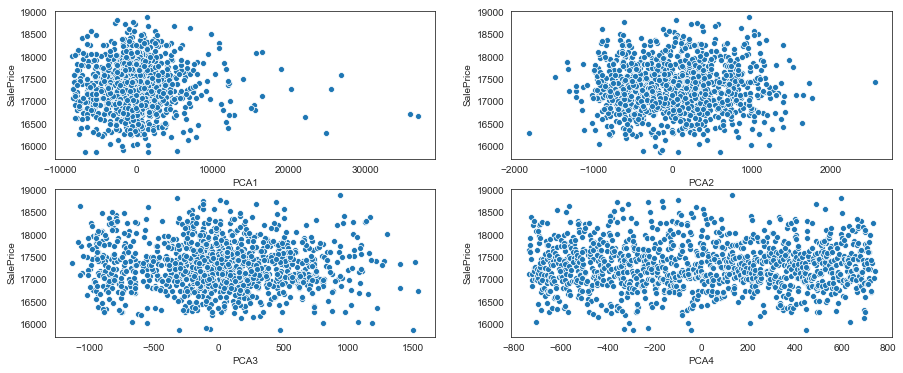

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.scatterplot(pca_scaled.PCA1, y)
plt.subplot(2,2,2)
sns.scatterplot(pca_scaled.PCA2, y)
plt.subplot(2,2,3)
sns.scatterplot(pca_scaled.PCA3, y)
plt.subplot(2,2,4)
sns.scatterplot(pca_scaled.PCA4, y)
plt.show()

In [ ]:
#After Removing Outlier
pca_scaled = pca_scaled[pca_scaled.PCA1<70000]

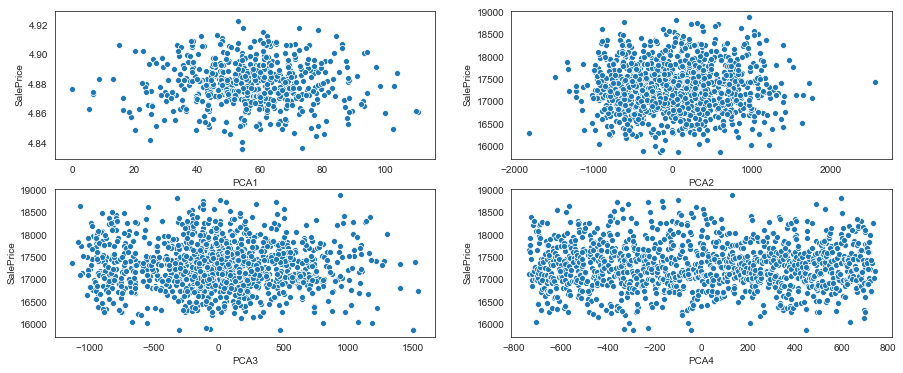

In [64]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.scatterplot( np.log(pca_scaled.PCA1)**2, np.log(np.sqrt(y)) )
plt.subplot(2,2,2)
sns.scatterplot(pca_scaled.PCA2, y)
plt.subplot(2,2,3)
sns.scatterplot(pca_scaled.PCA3, y)
plt.subplot(2,2,4)
sns.scatterplot(pca_scaled.PCA4, y)
plt.show()

<font color=red size=5>__Start Modeling__</font>